# Neo Ann Yi

# Data Science Internship

# Crisp Metrics

# Supervised Machine Learning on Diabetes Prediction

Task Highlights :

> Perform Supervised Machine Learning on Diabetes Prediction dataset (https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python as at April 1, 2021)

> Perform data analysis

> Make use of different algorithms to predict target label

> Show 3 different algorithms' accuracies with the help of graphs

The main problems to be solved by this data science task have been properly framed, in terms of client's goals, background information, and purpose of task. This ensures that the task is understood and explored to better inform the decision-making process on the possible range of approaches and solutions to the problems.

This task will extract relevant, representative, and sufficient case study data from a reputable and reliable online source. Appropriate preprocessing adjustments and data exploration will be performed on the data to ensure reliable and reasonable outcomes and outputs. For the data mining and modelling process, the popular classifier models of Decision Tree, Random Forest, and Multilayer Perceptron Neural Network will be fitted, analysed, and evaluated in terms of the performance metrics of accuracy, precision, recall, and F1-score in predicting the classifications of diabetes. All significant interpretations and observations will be noted and considered for future improvements. 

Following the purpose of this task, the primary focus will be on diabetes-related factors, which are a range of health measurements including 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age' as predictors. Analysing these will help to identify concern areas and assess and predict the diabetes outcome.

#### Note that throughout this task, the important points are differentiated using the Indented Quotes format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# Data Collection

The first step of a data science task is to obtain, gather, and measure the necessary and targeted data from available internal or external data sources, and then compiled into an established system. In this case, version 1 of Diabetes Machine Learning and Prediction dataset by Rahul in Kaggle is used. The Excel csv file that was extracted as at 1 April 2021 for the purpose of this task is available at https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python.

In [2]:
# import data from Excel csv sheet
df = pd.read_csv(r'C:\Users\annel\Downloads\CrispMetrics\diabetes_data.csv')

# show first 5 records of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# return the object type, which is dataframe
type(df)

pandas.core.frame.DataFrame

The dataframe format type will facilitate the use of a wider variety of syntax and methods for data analysis, including describe() and info().

Regarding the attributes included in Diabetes Prediction dataset, there are 8 different diabetes predictors, recorded as 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age'. The target class label is 'outcome', where 0 represents absence and 1 represents presence. Since the data is found to be labeled, supervised machine learning methods will be used to model the data later on.

# Data Preprocessing

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.

As the first step, null values within the dataset will be identified, and appropriately replaced if possible.

In [4]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 768 rows of records and 9 columns of attributes. The data types of the attributes consist of 1 quantitative discrete binary, 6 quantitative discrete numerical integers, and 2 quantitative continuous numerical float with 64 digit placings.

The memory space usage is at least 54.1 kilobytes (KB).

Through this, it is found that there are no null values present in the dataset.

Next, noises of impossible values are checked by analysing the maximum and minimum values using box plots and summary statistics.

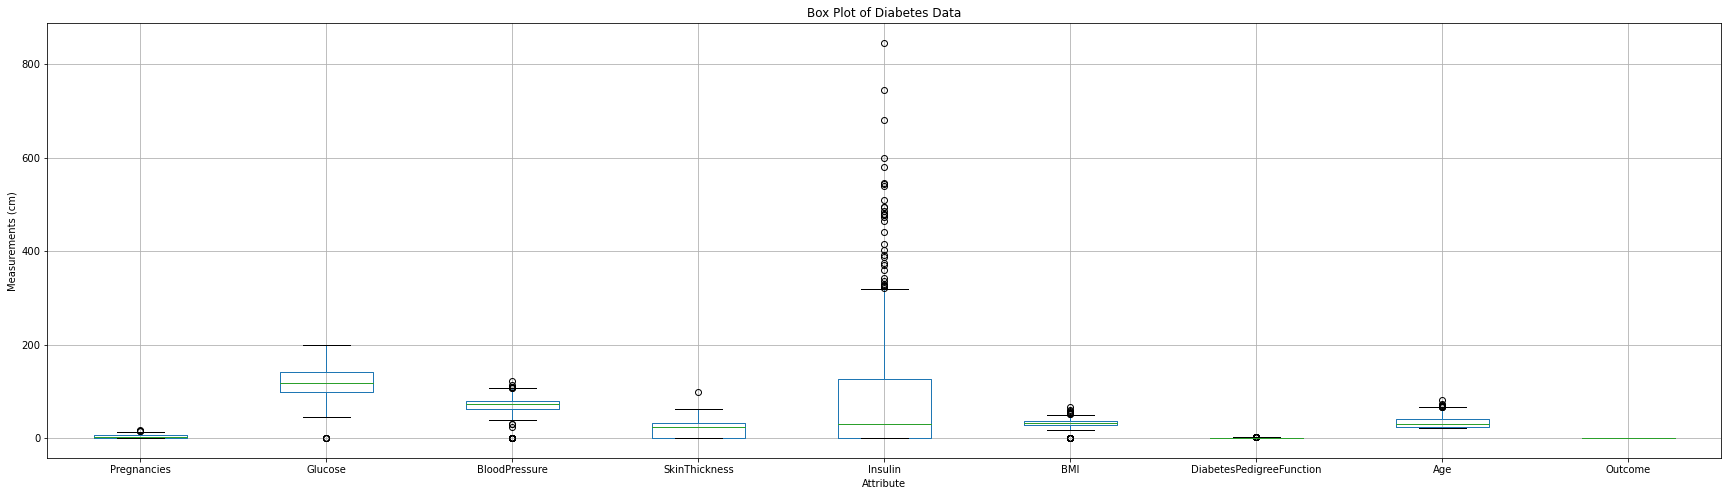

In [5]:
# identify impossible values and outliers using boxplot
df.boxplot(rot = 0, boxprops = dict(color = 'blue'), return_type = 'axes', figsize = (30, 8))
plt.title("Box Plot of Diabetes Data") # title of plot
plt.suptitle("")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements (cm)") # y axis label
plt.show()

In [6]:
# summary statistics of the attributes, including measures of central tendency and 
    # measures of dispersion
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


'Pregnancies' is the number of pregnancies to date, with a realistic range of 0 to 17.

'Glocose' is is the plasma glucose concentration over 2 hours in an oral glucose tolerance test, measured in milligrams per decilitre (mg/dL). A blood sugar level less than 140 mg/dL is normal. A reading of more than 200 mg/dL indicates diabetes, whereas that between 140 and 199 mg/dL (indicates prediabetes. The data ranges from 0 to 199, which indicates that the impossible value of 0 should be smoothed.

'BloodPressure' is the diastolic blood pressure, measured in millimeters of mercury (mm Hg). A normal blood pressure would have a reading of less than 80 mmHg, and this may vary from 90 to 120 mmHg for a healthy young person. A reading of more than 140 mmHg indicates high blood pressure. The data ranges from 0 to 122, which indicates that the impossible value of 0 should be smoothed.

'SkinThickness' is the triceps skin fold thickness, measured in millimeters (mm). The data ranges from 0 to 99, which indicates that the impossible value of 0 should be smoothed.

'Insulin' is the 2-hour serum insulin, measured in micrometre units per millilitre (mu U/ml). The data ranges from 0 to 846, which indicates that the impossible value of 0 should be smoothed.

'BMI' is the body mass index (BMI) for weight in kg and height in m (kg/m^2). The data ranges from 0 to 67, which indicates that the impossible value of 0 should be smoothed. BMI should not be close to zero unless the person is grossly underweight which could be life-threatening. 

'DiabetesPedigreeFunction' is a function that scores likelihood of diabetes based on family history, with a realistic range of 0.08 to 2.42. 

'Age' in years has a realistic range of 21 to 81.

'Outcome' is the target class label, where 0 represents absence and 1 represents presence of diabetes.

All impossible values will be smoothed by replacing them with the mean value.

In [7]:
# smooth impossible values by replacing the value with the mean value
df['Glucose'] = df['Glucose'].replace(0, df.Glucose.mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df.BloodPressure.mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df.SkinThickness.mean())
df['Insulin'] = df['Insulin'].replace(0, df.Insulin.mean())
df['BMI'] = df['BMI'].replace(0, df.BMI.mean())

The maximum and minimum values are checked to ensure that all noises of impossible values have been smoothed.

In [8]:
# confirm smoothed impossible values
# summary statistics of the attributes, including measures of central tendency and 
    # measures of dispersion
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Through this, it is found that there are no other noises of impossible values.

The Winsorisation method is popularly chosen to handle numerical outliers, where outlier values are replaced with the minimum or maximum non-outlier value identified using the interquartile range (IQR) method. The acceptable value range to not be considered an outlier is [Q1-1.5IQR, Q3+1.5IQR], where Q1 is the first quartile of 25 percentile, Q3 is the third quartile of 75 percentile, and IQR is (Q3 – Q1).

In addition, impossible and extreme numerical values can be assumed as incorrect data entries, where they are identified as differing from the mean attribute value by a comparatively large margin.

In this case, no values were considered as outliers or impossible and extreme values, since all numerical values are reasonable and within an expected range in relation to the Diabetes Prediction's absence or present case study.

Duplicated rows or records will not be dropped from the dataset in this case. There is no certain redundancy which causes inaccurate results and outcomes, since the dataset has no unique identfier that denotes separate entities. Despite this, the dataset will still be checked for duplicated rows.

In [9]:
# detect duplicated records
df[df.duplicated(subset = None, keep = False)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are no duplications in the dataset.

Data integration is not needed, since only one dataset is used with no schema integrations, and thus no discernable entity identification issues or data value conflicts.

Data transformation will check overall range of values for the entire dataset. All values should fall under an acceptable small range to allow easy visualisations and modelling. It is found that all values already fall under an acceptable range of [0, 846], so there is no need for data transformation to scale the values into a comparable range for easy visualisations and modelling.

Data reduction may involve dropping redundant attributes through attribute dimensionality reduction. However, there are no related cases detected thus far.

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values and thus almost perfect descriptions of each other. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

However, Decision Tree, k-Nearest Neighbours, and Naive Bayes models are chosen as most appropriate classification models, and they are all immune to multicollinearity. The first two are non-parametric models - Decision Tree only examines one of the features at a time during the splitting process, while KNN examines features all together. Naïve Bayes assumes all features are conditionally independent. Due to these reasons, the only predictors that are considered to be dropped will be if their intercorrelations are above 0.95 and thus almost perfect descriptions of each other. It would be redundant to include both of them. Therefore, no attributes were removed as to not lose relevant information and degrade the overall supervised machine learning prediction model.

Pairs plot or scatterplot matrix are used to identify and remove attributes with weak class-attribute relationship. This is of most use and interest for classification purposes. Scatter plots on the upper triangle will visualize the relationships between two variables. Kernel density estimate (KDE) plots, which will be discussed in further detail in the next section, will illustrate the univariate distribution of a single variable in relation to the target variable. 2-D kernel density plots on the lower triangle will illustrate the density of single variable in relation to the target variable. 

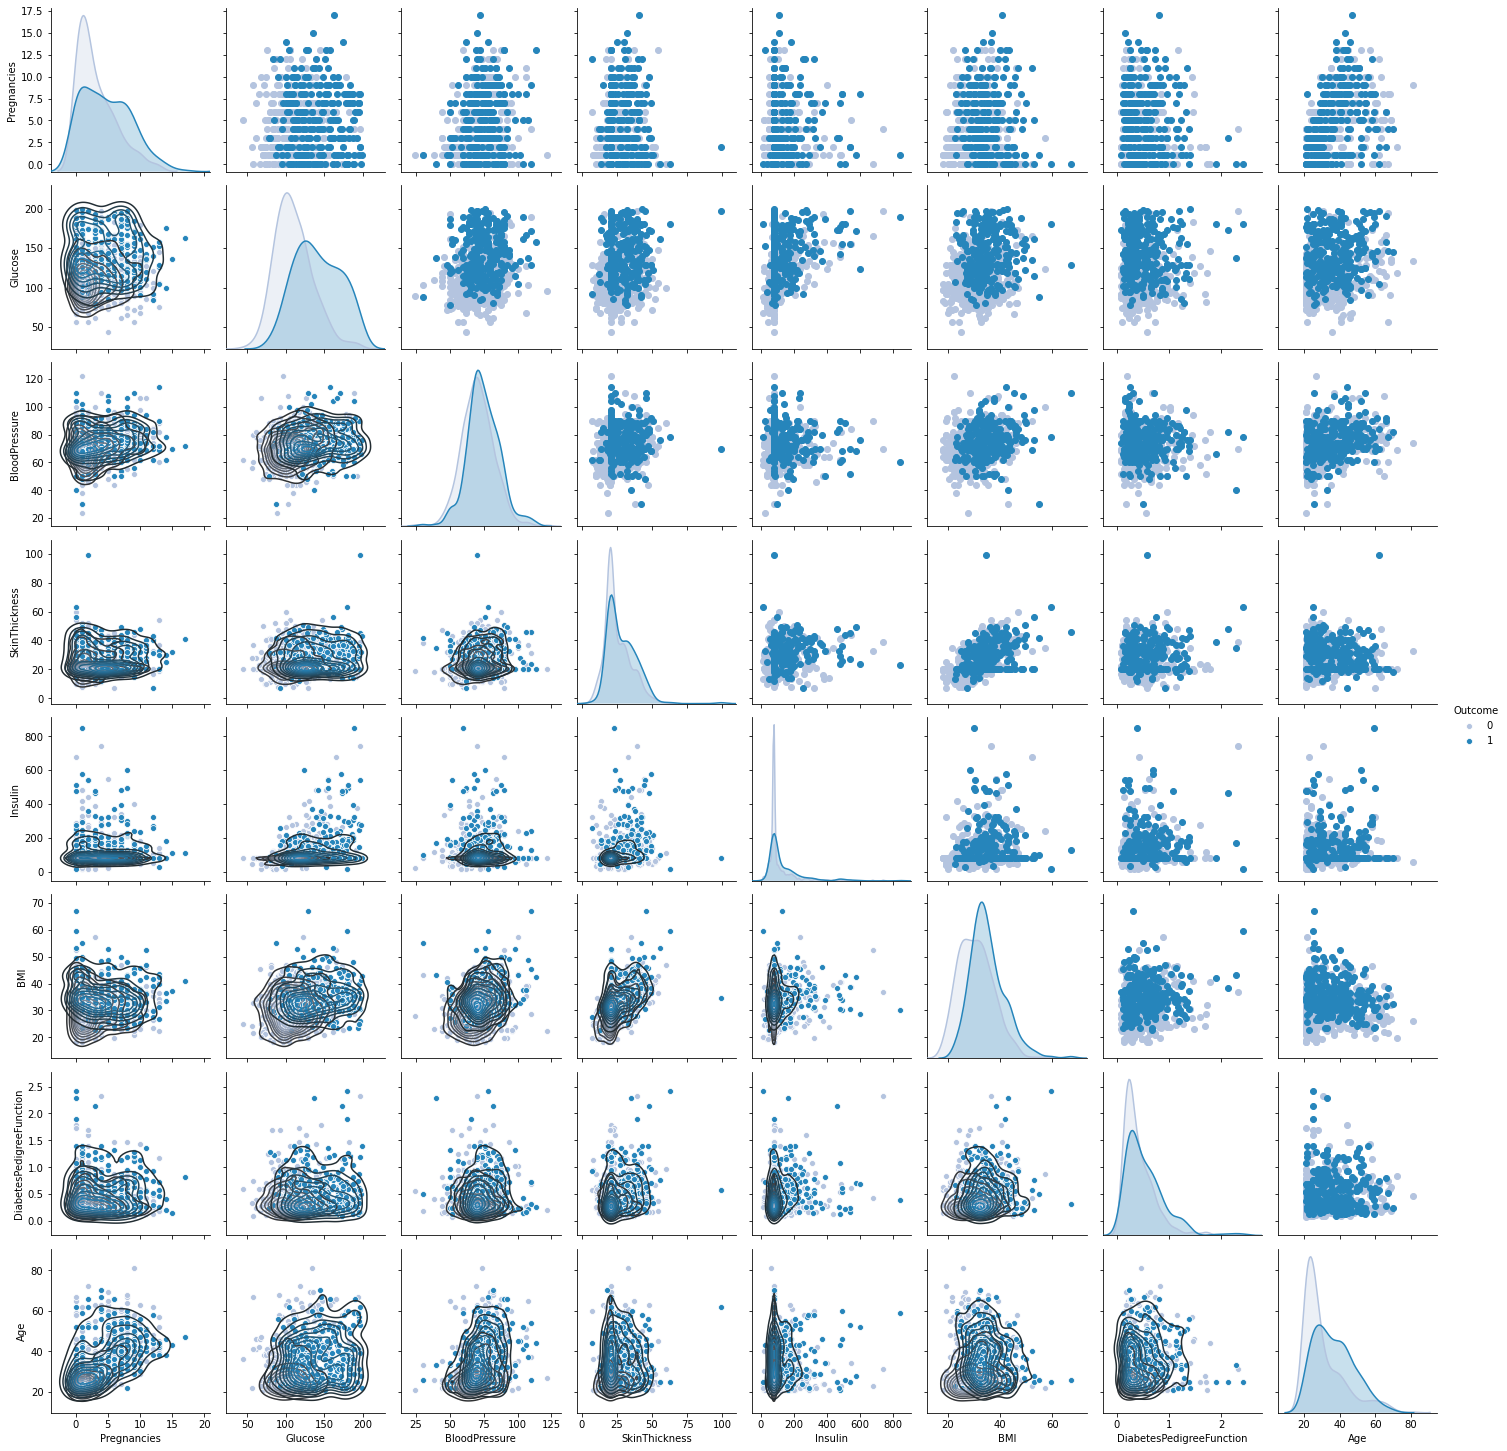

In [10]:
# import searborn library for more variety of data visualisation using fewer syntax and interesting default themes
import seaborn as sns 

# visualise pairs plot or scatterplot matrix in relation to diabetes outcome
g = sns.pairplot(df, hue = 'Outcome', palette = 'PuBu')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

All of them were analysed, and it was found that all features have acceptably clear class-attribute relationship with relatively distinguishable class boundaries as well as acceptable degree of overlapping or overplotting areas. Therefore, no attributes were removed as they are all able to allow relatively accurate predictions for classification purposes.

The final dataset information is summarised below.

In [11]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


The dataset contains 768 rows of records and 9 columns of attributes. The data types of the attributes consist of 1 quantitative discrete binary, 6 quantitative discrete numerical integers, and 2 quantitative continuous numerical float with 64 digit placings.

The memory space usage is at least 54.1 kilobytes (KB).

# Exploratory Data Analysis (EDA)

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy in diagosing diabetes.

Taking a closer look at the target class labels, as well as their frequency of occurences :

In [12]:
# list and count the target class label names and their frequency
from collections import Counter
count = Counter(df['Outcome'])
count.items()

dict_items([(1, 268), (0, 500)])

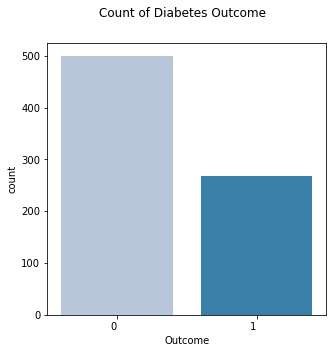

In [13]:
# count of each target class label
plt.figure(figsize = (5, 5))
ax = sns.countplot(df['Outcome'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "right")
plt.suptitle("Count of Diabetes Outcome")
plt.show()

There are two classes of diabetes outcome with quantitative discrete binary data values, where 1 has 268 instances, and 0 has 500. This clearly illustrates that data available for the target class of 1 is approximately half the proportion than that for 0, which will be taken note of for further data visualisations and analysis later on. 

Moving on to analyse the quantitative attributes of diabetes predictors, their linear relationships and their strengths can be compared using a correlation heatmap.

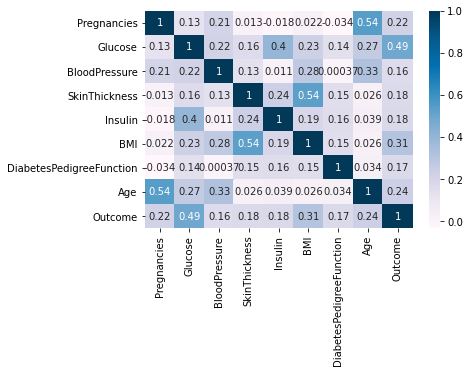

In [14]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

Almost all predictors have weak linear correlations, which is indicative that most are more likely to have non-linear relationships. Notably, when Glucose and BMI increases by 1 unit each, the positive Outcome of diabetes increases by 0.49 units and 0.31 units respectively. The population is thus advised to reduce their glucose intake and BMI readings in order to minimise the chances of diabetes.

Thus far, analysis is mostly focused on the relationship between the various diabetes features and the target feature which is diabetes outcome. This is because the classification purpose will be mostly interested in these types of correlation and their strengths, in order for accurate predictions. 

matplotlib.pyplot graphics library is imported for the visualisations of figures. It is convenient as it has good reproducibility of scientific figures, for example when regenerating a figure using updated data, appearance, latex labels and texts, and aspects such as orientation. %matplotlib inline is used to configure the output of the figures to be embedded in the Jupyter notebook file, instead of opening a new window each time.

All data visualisation include suitable graphs that are descriptive and comparative to effectively communicate both abstract and concrete ideas. 

Previously, pairs plot or scatterplot matrix was plotted. Histogram density plots are chosen to illustrate the overall data distribution, as well as the data distributions of diabetes outcome based on the predictor features. Kernel density estimate (KDE) plots will visualise the overall distribution through a continuous probability density curve. Two histogram density plots and their continuous probability density curves are generated for the two target feature values in the same figure space, and clearly differentiates them by specifying different RGB hex colour codes in its parameters. The plot range is limited to 0 and above for meaningful visualisations, since it is impossible for the predictor features to have a negative value.

All the overall KDE distribution curves have positive leptokurtic kurtosis and right or positive skewness, since the data instances available for the 0 class is approximately twice that of 1. ALl attributes except for 'BloodPressure' have bimodal or multimodel data distribution as there are two distinct peaks also known as local maxima. 'BloodPressure' have approximate normal data distribution as the curves are approximately symmetric, unimodal, asymptotic, and their mean, median, and mode are similar.

The histogram density plots and their respective highest point in the curves show the patterns that diabetes patients generally have higher numbers of Pregnancies, higher Glucose and BMI readings, and older in Age. 

The difference in the overlapping or overplotting histogram density plots clearly shows that the target class of strongly correlated features can be predicted more easily, and more useful meaning can be extracted. Its data points are less scattered and thus have less overlapping or overplotting areas, which means that they better follow their respective common relationship or pattern. It can thus be seen that the ranking of correlation to diabetes outcome, in decreasing order, is 'Glucose', 'Age', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness', and 'Insulin'. 'Glucose' is thus the best predictor of diabetes outcome in this case.

Lastly, the summary statistics will be considered.

In [15]:
# summarise main characteristics by displaying the summary statistics of the attributes, including 
    # measures of central tendency, and measures of dispersion
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


describe() is used to obtain summary statistics including measures of central tendency such as mean and median, and measures of dispersion such as standard deviation, which are useful in providing a quick and simple description of the dataset and its characteristics. 

# Data Modelling

The dataset is split into two separate sets - the training set and test set. They both consist of the same attributes, but not the same attribute values. The training set is used to train and construct the classification models. The test set is used to predict the classifications of the new unbiased data that were not used to train the model, before evaluating the model performance based on the performance metrics of accuracy, precision, recall, and F1-score of those classifications.

The target labels have uneven distribution. In order to ensure that the training and test sets are unbiased and representative of the two classes, the list of random numbers starting from the random selected position of 987 is used to perform random splitting. An accuracy graph is plotted to find the most accurate training set proportion, after taking the chosen Decision Tree (DT), Naive Bayes (NB), and KNN model scores into consideration. 

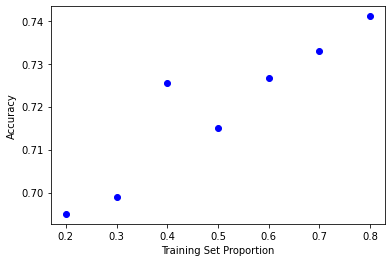

In [16]:
# classify and model the data using k-Nearest Neighbour (KNN), Decision Tree (DT), and Naive Bayes (NB)
    # machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import math

df['Outcome'] = df.Outcome.astype(str)
df['Outcome'] = df.Outcome.astype(object)

# split dataset into attributes and labels
X = df.iloc[:, :-1].values # the attributes
y = df.iloc[:, 8].values # the labels

# choose appropriate range of training set proportions
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# plot decision tree based on information gain
DT = DecisionTreeClassifier(splitter = 'best', criterion = 'entropy', min_samples_leaf = 2)

# use Gaussian method to support continuous data values
NB = GaussianNB()

# choose recommended optimal number of clusters of sqrt(number of records)
KNN = KNeighborsClassifier(n_neighbors = math.ceil(math.sqrt(768)))

# find best training set proportion for the chosen models
plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s, random_state = 987)
        DT.fit(X_train, y_train) # consider DT scores
        scores.append(DT.score(X_test, y_test))
        NB.fit(X_train, y_train) # consider NB scores
        scores.append(NB.score(X_test, y_test))
        KNN.fit(X_train, y_train) # consider KNN scores
        scores.append(KNN.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training Set Proportion') # x axis label
plt.ylabel('Accuracy'); # y axis label

According to the graph, the training subset should take up 80% of the dataset which is 119 instances, whereas the test subset will take up 20% which is 30 instances. The machine Learning models of DT, NB, and KNN are now fitted to the training dataset.

For the KNN model, the optimal value of k number of nearest neighbours is found by plotting an accuracy graph.

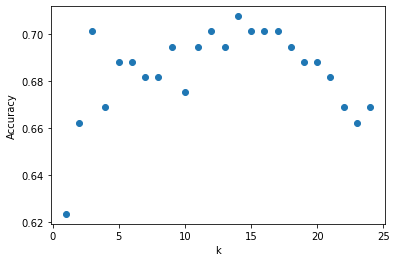

In [17]:
# choose train test splits from original dataset as 80% train data and 20% test data for highest accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=987)

# find optimal k number of clusters
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k') # x axis label
plt.ylabel('Accuracy') # y axis label
plt.scatter(k_range, scores) # scatter plot
plt.xticks([0, 5, 10, 15, 20, 25]);

In [18]:
# number of records in training set
len(X_train)

614

The training subset takes up 614 instances, whereas the test subset takes up the remaining 154 instances.

In [19]:
# count each outcome in training set
count = Counter(y_train)
print(count.items())

dict_items([('0', 408), ('1', 206)])


The target class label will also have uneven distribution, where 0 has 408 instances, and 1 has 206.

The accuracy graph identifies the optimal value of k as 15 in order to obtain slight above 70% accuracy, the highest possible for this dataset. This is done to obtain a k value that is large enough to minimise error rate and sensitivity to noise, but not too large such that the boundaries are over-smoothed or overfitted with points from the other classes. The chosen k value is also appropriate since 15 is not a multiple of the 2 classes, which is a requirement when selecting k value. The KNN model parameters are thus the value of k of 15, and Euclidean distance metric to compute the distance between data points. The output is the assigned class membership based on the majority vote on the data point’s k number of neighbors.

In [20]:
# using k-Nearest Neighbour (KNN) classifier
# choose 7 as the optimal number of clusters
classifierKNN = KNeighborsClassifier(n_neighbors = 15)
classifierKNN.fit(X_train, y_train)

# using Euclidean distance metric
classifierKNN.effective_metric_

'euclidean'

Gaussian Naïve Bayes is suitable for continuous data types, and the prior probabilities and likelihoods are computed in order to predict the posterior probability of a data point belonging to each of the three classes. The outputs are the aforementioned posterior probabilities, and the assigned class membership is selected as the class with the highest posterior probability.

In [21]:
# using Naive Bayes (NB) classifier
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

# show prior probability of each class
classifierNB.class_prior_

array([0.66449511, 0.33550489])

The class prior indicates the probability of a observation belonging to a specific class if no information was given. The probability of prediction is 66.45% as 0 and only 33.55% as 1.

Decision tree is constructed based on parameters of best split strategy, and the criterion of entropy which utilises information gain to iteratively select the next node according to higher feature importance to optimise the quality of splits. The minimum number of leaves are restricted to 2. The outputs are the classification rules as extracted from the decision tree. These are determined by the flow sequence from the root node and the corresponding branches to the internal or decision nodes, then stopping when the leaf node representing the class label is reached.

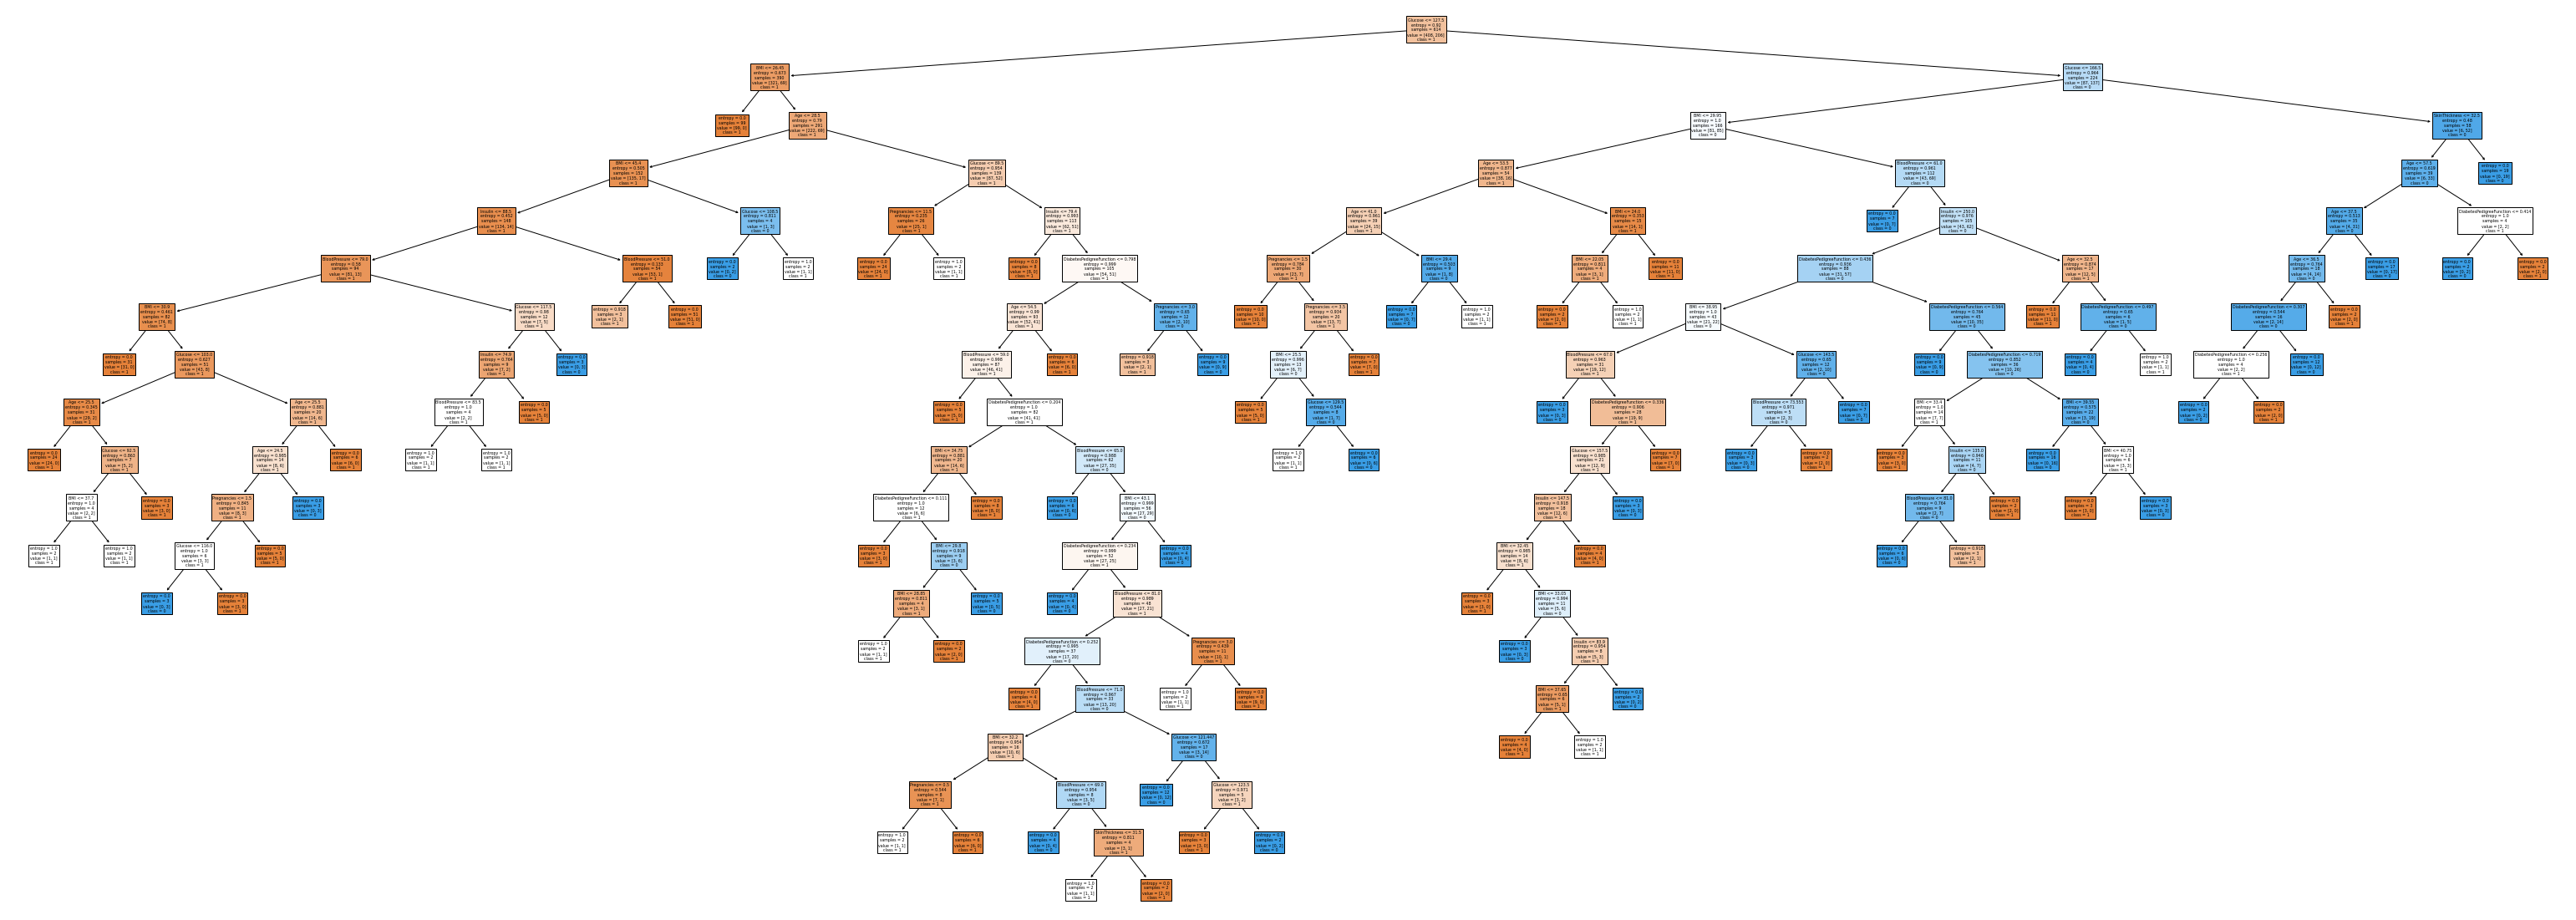

In [22]:
# using Decision Tree (DT) classifier
classifierDT = DecisionTreeClassifier(splitter = 'best', criterion='entropy', min_samples_leaf = 2)
classifierDT.fit(X_train, y_train)

# plot decison tree
from sklearn import tree
fig = plt.figure(figsize = (55, 20))
fn = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
DT = tree.plot_tree(classifierDT,
                    feature_names = fn,  
                    class_names = y,
                    filled = True)
# outputs all extracted rules

In [23]:
# identifies the important features
classifierDT.feature_importances_

array([0.05354238, 0.306957  , 0.10138268, 0.00933674, 0.05806409,
       0.22671393, 0.10125151, 0.14275166])

Feature importance will calculate the decrease in node impurity weighted by the probability of reaching that node. The node probability is the number of samples that reach the node, divided by the total number of samples. Higher values indicate higher feature importance in the DT prediction model.

Data Modelling is now complete.

# Model Evaluation

In [24]:
# number of records in test set
len(X_test)

154

In [25]:
# count each outcome in test set
count = Counter(y_test)
print(count.items())

dict_items([('0', 92), ('1', 62)])


The model performance is evaluated and validated by using the test set of 154 records to predict the classifications of these new unbiased data that were not used to train the model. The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. The supports are 92 instances for the target class label of 0 and 62 for 1. This process ensures that the models are useful by being generalisable even when the specific training data used is extended to include new test data, or in technical terms ‘avoid over fitting’.

In [26]:
# use the chosen three models to make predictions on test data
y_predKNN = classifierKNN.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predNB = classifierNB.predict(X_test)

In [27]:
# for k-Nearest Neighbours model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierKNN.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predKNN))

[[76 16]
 [30 32]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        92
           1       0.67      0.52      0.58        62

    accuracy                           0.70       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.70      0.70      0.69       154

Train Accuracy:  0.7785016286644951
Test Accuracy:  0.7012987012987013


In [28]:
# for Naive Bayes model
# using confusion matrix
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierNB.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predNB))

[[76 16]
 [23 39]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        92
           1       0.71      0.63      0.67        62

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.74      0.75      0.74       154

Train Accuracy:  0.749185667752443
Test Accuracy:  0.7467532467532467


In [29]:
# for Decision Tree model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[75 17]
 [21 41]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        92
           1       0.71      0.66      0.68        62

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154

Train Accuracy:  0.9706840390879479
Test Accuracy:  0.7532467532467533


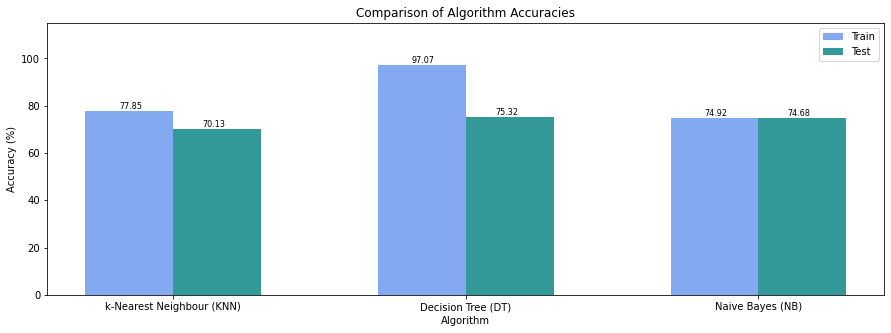

In [30]:
# data to plot
n_groups = 3
algorithms = ('k-Nearest Neighbour (KNN)', 'Decision Tree (DT)', 'Naive Bayes (NB)')
train_accuracy = (accuracy_score(y_train, classifierKNN.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierNB.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predKNN)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predNB)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

NB model has the overall performance metrics of 74.68% accuracy, 74% precision and F1-score, and 75% recall. The KNN model achieved worse as 70.13% accuracy, 70% precision and recall, and 69% F1-score. On the other hand, the overall performance metrics of the DT model is the best, with 78.57% accuracy, 78% precision and F1-score, and 79% recall. For all three chosen models, the diabetes outcome that was best classified is 0. 

Next, the degree of overfitting must also be taken into consideration before the best model is chosen. Disregarding KNN due to its comparatively poor overall performance metrics, NB model only has a small difference between the train and test accuracy and thus no overfitting, and the 74.68% train accuracy indicates that the learnt rules are not specific for the train set and will generalize well beyond the train set to the test set. Due to this, NB is chosen as the final best model over DT, since DT overfits the data with a large difference between the train and test accuracy.

Accuracy indicates the overall proportion of correct predictions for all the three classes. The train accuracy is measured based on examples that the model was constructed on, while the test accuracy is based on those it has yet to see. NB achieved 74.68% for both train accuracy and test accuracy.

However, it will be misleading to solely base decisions on this, as the dataset used is relatively small and biased. Recall and precision metrics are thus also considered to measure model performance.

Recall indicates the proportion of correct predictions for each individual class, out of the corresponding actual class. In other words, the proportion of all actual classes that were predicted correctly. It was found that 75% of all actual classes were predicted correctly by NB.

Precision indicates the proportion of correct predictions for each individual class, out of the corresponding predicted class. In other words, the proportion of all predicted classes were actually predicted correctly. It was found that 74% of all predicted classes were actually predicted correctly by NB.

However, recall and precision have an inverse relationship. In order to make them comparable for cases where they are both important, F1 score is introduced. F1-score, also known as F-score or F-measure, is used to make precision and recall comparable in cases where they are both important, by measuring their harmonic mean. This allows it to consider both metrics and punish extreme values more heavily. F-score is more useful for biased datasets that are common in real-life scenarios, as well as in this case study. This occurs when the counts of, in this case FP of 20 and FN of 13, are very different, but they must still be properly considered since they are crucial conditions in the prediction. False negative (FN) and false positive (FP) are both the worst error in diabetes prediction, as the implications of a wrong classification for a FN for a patient misdiagnosed as not having diabetes is that the patient to lose out on immediate treatment and medications and may lead to death if the mistake is discovered too late. On the other hand, a FP for a patient misdiagnosed as having diabetes will cause the patient to be subjected to unneeded treatments and medications which may lead to other health problems. Therefore, F-score will compute the overall quality of translations produced by the chosen machine learning engine, which is 74% by the NB model.

The confusion matrix tabulates the predicted class vertically and the actual class horizontally.

In conclusion, the NB model is chosen as the final model for the prediction of diabetes outcome.

# Model Interpretation

The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.

The NB model is now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of diabetes factors. The maximum and minimum values of each feature is considered before creating the data frame, in order to ensure that all values are reliable and acceptable.

In [31]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


A similar example is demonstrated below, using 'Pregnancies' of 1, 'Glucose' of 50 mg/dL, 'BloodPressure' of 80 mm Hg, 'SkinThickness' of 33 mm, 'Insulin' of 70 mu U/ml, 'BMI' of 30 kg/m^2, 'DiabetesPedigreeFunction' of 0.55, and 'Age' of 20 years old. These new data instances will be passed to the NB model classifier to predict its class label of diabetes outcome.

In [32]:
# new data
newdata = [[1, 50, 80, 33, 70, 30, 0.55, 20]]

# compute probabilities of assigning to each of the two classes of outcome
probaNB = classifierNB.predict_proba(newdata)
probaNB.round(4) # round probabilities to four decimal places, if applicable

array([[0.9892, 0.0108]])

In [33]:
# make prediction of class label
predNB = classifierNB.predict(newdata)
predNB

array(['0'], dtype='<U1')

The predicted class for the specified example is assigned as 0, as its probability of 98.92% is almost equal to a 100% certainty and very much higher that that of class 0 of diabetes outcome. It is also safe to intepret this result as having 74.68% accuracy, 74% precision and F1-score, and 75% recall, based on the NB model's performance metrics.

Possible improvements can be to include other strong predictors of diabetes outcome outside of the aforementioned 8, such as weight and skin dryness. The presence of these symptoms can be very relevant and thus useful to include in the model design.

# Thank you !